In [8]:
import platform
if platform.system() == 'Windows':
    DATA_PATH = r'E:\\Python\\data\\data\\kaggle\\predict-student-performance-from-game-play\\'
elif platform.system() == 'Linux':
    DATA_PATH = r'/home/parking/ml/data/data/kaggle/predict-student-performance-from-game-play/'

TRAIN_PATH = DATA_PATH + 'train.csv'
TRAIN_LABEL_PATH = DATA_PATH + 'train_label.csv'
TEST_PATH = DATA_PATH + 'test.csv'

import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
print(DEVICE)
print(DATA_PATH)
print(TRAIN_PATH)
print(TRAIN_LABEL_PATH)

cpu
E:\\Python\\data\\data\\kaggle\\predict-student-performance-from-game-play\\
E:\\Python\\data\\data\\kaggle\\predict-student-performance-from-game-play\\train.csv
E:\\Python\\data\\data\\kaggle\\predict-student-performance-from-game-play\\train_label.csv


In [10]:
# one_hot_encoding을 적용할 컬럼
ohe_cols = ['event_name', 'level', ]
# nomalize를 적용할 컬럼 (0~1)

# nomalize를 적용할 컬럼 (-1~1)

# label encoding을 적용할 컬럼

In [11]:
import pandas as pd
import numpy as np

train_df = pd.read_csv(TRAIN_PATH)

train_df.head(15)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [3]:
# 결측치 -> 0으로 채우기
train_df.fillna(0, inplace=True)
# screen_coor_x, screen_coor_y, text 제거
train_df.drop(['screen_coor_x', 'screen_coor_y', 'text'], axis=1, inplace=True)
train_df.head(15)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,hover_duration,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,0.0,-413.991405,-159.314686,0.0,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,0.0,-412.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,0.0,-412.991405,-157.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,0.0,478.485079,-199.971679,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,0.0,503.355128,-168.619913,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,0.0,510.733442,-157.720642,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,0.0,512.048005,-153.743631,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [4]:
# name == undefined 제거
train_df = train_df[train_df['name'] != 'undefined']
train_df.head(15)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,hover_duration,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,0.0,-413.991405,-159.314686,0.0,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,0.0,-412.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,0.0,-412.991405,-157.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,0.0,478.485079,-199.971679,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,0.0,503.355128,-168.619913,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,0.0,510.733442,-157.720642,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,0.0,512.048005,-153.743631,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [5]:
# 'hold_time' 컬럼 생성
# 이전 인덱스의 elapsed_time을 현재 인덱스의 elapsed_time에서 뺀값
# 단, 이전 인덱스가 없으면 0으로 채움,
# 계산뒤 값이 음수면 0으로 채움
train_df['hold_time'] = train_df['elapsed_time'].diff(periods=1).fillna(0)
train_df['hold_time'] = train_df['hold_time'].apply(lambda x: 0 if x < 0 else x)

train_df.head(15)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,hover_duration,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,hold_time
0,20090312431273200,0,0,cutscene_click,basic,0,0.0,-413.991405,-159.314686,0.0,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0
1,20090312431273200,1,1323,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,1323.0
2,20090312431273200,2,831,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0.0
3,20090312431273200,3,1147,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,316.0
4,20090312431273200,4,1863,person_click,basic,0,0.0,-412.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,716.0
5,20090312431273200,5,3423,person_click,basic,0,0.0,-412.991405,-157.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,1560.0
6,20090312431273200,6,5197,person_click,basic,0,0.0,478.485079,-199.971679,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,1774.0
7,20090312431273200,7,6180,person_click,basic,0,0.0,503.355128,-168.619913,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,983.0
8,20090312431273200,8,7014,person_click,basic,0,0.0,510.733442,-157.720642,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,834.0
9,20090312431273200,9,7946,person_click,basic,0,0.0,512.048005,-153.743631,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,932.0


In [8]:
# 유저 아이디별로 데이터 프레임을 나눔
user_df_list = [group[1] for group in train_df.groupby('session_id')]
user_df_list[0]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,hover_duration,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,hold_time
0,20090312431273200,0,0,cutscene_click,basic,0,0.0,-413.991405,-159.314686,0.0,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0
1,20090312431273200,1,1323,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,1323.0
2,20090312431273200,2,831,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0.0
3,20090312431273200,3,1147,person_click,basic,0,0.0,-413.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,316.0
4,20090312431273200,4,1863,person_click,basic,0,0.0,-412.991405,-159.314686,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,20090312431273200,921,1260991,notification_click,basic,21,0.0,162.725446,-84.244420,0.0,0,tunic.historicalsociety.stacks,tunic.historicalsociety.stacks.journals_flag.p...,0,0,1,13-22,616.0
871,20090312431273200,922,1261975,notification_click,basic,21,0.0,89.725514,-88.244420,0.0,0,tunic.historicalsociety.stacks,tunic.historicalsociety.stacks.journals_flag.p...,0,0,1,13-22,984.0
873,20090312431273200,924,1262857,object_click,close,21,0.0,445.725525,280.755580,0.0,journals_flag,tunic.historicalsociety.stacks,0,0,0,1,13-22,882.0
877,20090312431273200,928,1268292,map_hover,basic,22,0.0,0.000000,0.000000,366.0,tomap,tunic.historicalsociety.entry,0,0,0,1,13-22,5435.0


In [11]:
# 각 유저 아이디의 데이터 프레임별로 커서의 이동거리를 계산
# 이전 x좌표와 현재 x좌표의 차이, 이전 y좌표와 현재 y좌표의 차이를 계산
# 계산뒤 값의 절대값을 취함

# 이전 x좌표와 현재 x좌표의 차이
for df in user_df_list:
    df['diff_x'] = df['room_coor_x'].diff(periods=1).fillna(0)
    df['diff_x'] = df['diff_x'].apply(lambda x: abs(x))

    # 이전 y좌표와 현재 y좌표의 차이
    df['diff_y'] = df['room_coor_y'].diff(periods=1).fillna(0)
    df['diff_y'] = df['diff_y'].apply(lambda x: abs(x))
    
    # room_coor_x, room_coor_y 제거
    df.drop(['room_coor_x', 'room_coor_y'], axis=1, inplace=True)

user_df_list[0].head(15)

,session_id,index,elapsed_time,event_name,name,level,page,hover_duration,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,hold_time,diff_x,diff_y
0,20090312431273200,0,0,cutscene_click,basic,0,0.0,0.0,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0,0.000000,0.000000
1,20090312431273200,1,1323,person_click,basic,0,0.0,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,1323.0,0.000000,0.000000
2,20090312431273200,2,831,person_click,basic,0,0.0,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0.0,0.000000,0.000000
3,20090312431273200,3,1147,person_click,basic,0,0.0,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,316.0,0.000000,0.000000
4,20090312431273200,4,1863,person_click,basic,0,0.0,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,716.0,1.000000,0.000000
5,20090312431273200,5,3423,person_click,basic,0,0.0,0.0,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,1560.0,0.000000,2.000000
6,20090312431273200,6,5197,person_click,basic,0,0.0,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,1774.0,891.476485,42.656993
7,20090312431273200,7,6180,person_click,basic,0,0.0,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,983.0,24.870048,31.351766
8,20090312431273200,8,7014,person_click,basic,0,0.0,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,834.0,7.378314,10.899271
9,20090312431273200,9,7946,person_click,basic,0,0.0,0.0,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4,932.0,1.314563,3.977011


In [25]:
# 그룹바이 session_id
# session_id별로 row의 길이를 구함
user_event_count = train_df.groupby('session_id').size()
user_event_count.min(), user_event_count.max(), user_event_count.mean(), len(user_event_count)

(377, 7465, 576.8254392666157, 23562)

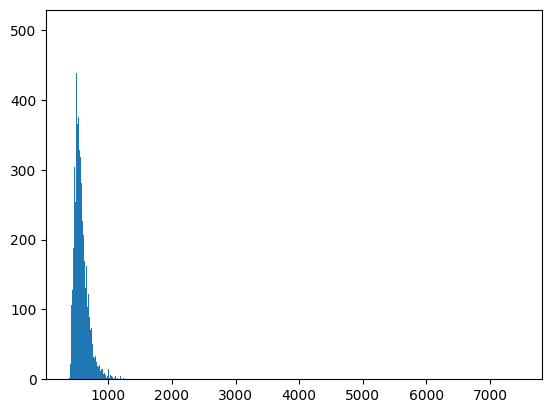

In [27]:
import matplotlib.pyplot as plt

# 유저별 이벤트 카운트 히스토그램
plt.hist(user_event_count, bins=2000)
plt.show()

session_id -> 유저 아이디 -> 아이디별로 나누어야함

elapsed_time -> 시작시간으로부터 경과시간 -> 이전 이벤트에서의 경과시간 'hold_time'을 만들어보자
	-> 경과시간은 0~1 민맥스, 유지시간은 -1~1 표준편차

event_name -> 이벤트 이름 ohe인코딩 하면되지 않을까

name -> 이벤트의 이름? undefined는 제거해도 될것같아보임
	-> 제거 이후 ohe

level -> level_group에 포함된 정보이기 때문에 제거해도 되어보임

page -> ???? 노트북 관련 이벤트에만 이용 -> 제거해도 무방해보임


room_coor_x, room_coor_y, screen_coor_x, screen_coor_y

	-> 게임 내 방기준 클릭좌표, 디스플레이 기준 화면 좌표
	-> 데이터가 중복되어보임, 전체화면이 아닐 수 있음 -> 게임 기준 좌표만 사용
	-> 호버시 0으로 채움
	-> 정규화는 0~1? -> 0에 가까운 좌표인 경우 씹히는 문제

이전 좌표와의 거리 컬럼 'mouse_movement'?

	-> 식은 이전좌표 pre_x, pre_y 라 할떄
	-> sqrt( (x-pre_x)**2 + (y-pre_y)**2 ) (유클리드 거리)
	-> 이전 이벤트의 클릭과 거리 계산. -> 같은 자리에서의 클릭일 수록 영양가 없을 가능성이 높음
	-> 0~1로 정규화, 원본 좌표 컬럼은 삭제해도 될듯.

hover_duration -> 호버가 발생한 시간 -> 없는경우 0으로

text -> text_fqid에 들어가있는 정보나 마찬가지. 내용은 중요치 않으므로 삭제

fqid -> 이벤트 아이디, 없는경우를 포함해 ohe

room_fqid -> 방(씬)ID, ohe

text_fqid -> 텍스트 ID ->  없는 경우 포함해 ohe

fullscreen	hq	music
	-> 0또는 1이므로 그대로 사용

level_group -> ohe



중요한 것은 사람마다 전부 다른 이벤트의 갯수.
어떻게 압축하느냐가 문제.

랜덤 500여개 정도의 인덱스를 가져와서 500 x col로 계산? -> 데이터 손실이 꽤 심할듯

사람당 몇개의 인덱스가 있는지 확인해보자
